In [4]:
%pip install opencv-python numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 4.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('images/1.jpg')
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2))

# Convert to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and make edge detection more effective
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding box around the largest contour (assuming the foreground object is the largest)
if contours:
    print('Countor Box: ', contours)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Draw the bounding box on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Save or display the image with bbox
    cv2.imshow('Bounding Box', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Optionally save the image
    cv2.imwrite('/path_to_save_image/bbox_output.jpg', image)

# Print the bounding box coordinates
print(f'Bounding Box: x={x}, y={y}, width={w}, height={h}')


Countor Box:  (array([[[560, 658]],

       [[559, 659]],

       [[557, 659]],

       [[556, 660]],

       [[551, 660]],

       [[556, 660]],

       [[557, 659]],

       [[559, 659]],

       [[560, 658]],

       [[564, 658]]], dtype=int32), array([[[523, 658]],

       [[527, 658]],

       [[528, 659]],

       [[529, 659]],

       [[530, 660]],

       [[532, 660]],

       [[533, 661]],

       [[534, 661]],

       [[535, 662]],

       [[536, 662]],

       [[537, 663]],

       [[540, 663]],

       [[541, 662]],

       [[542, 663]],

       [[542, 664]],

       [[543, 664]],

       [[544, 665]],

       [[544, 664]],

       [[545, 663]],

       [[546, 663]],

       [[547, 662]],

       [[549, 662]],

       [[550, 663]],

       [[552, 663]],

       [[551, 663]],

       [[550, 662]],

       [[546, 662]],

       [[545, 663]],

       [[544, 663]],

       [[543, 664]],

       [[541, 662]],

       [[540, 663]],

       [[537, 663]],

       [[536, 662]],

   

In [14]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.1/601.3 MB 565.0 kB/s eta 0:14:12^C
     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.1/601.3 MB 564.5 kB/s eta 0:14:13
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [19]:
import cv2
import numpy as np

def detect_foreground_objects(rgb_image, depth_map):
    # Step 2: Preprocessing - Smooth the depth map
    depth_map_smoothed = cv2.GaussianBlur(depth_map, (5, 5), 0)

    # Step 3: Thresholding - Segment objects based on depth
    _, thresh_depth = cv2.threshold(depth_map_smoothed, 127, 255, cv2.THRESH_BINARY)

    # Step 4: Contour Detection
    contours, _ = cv2.findContours(thresh_depth, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Region Growing
    segmented_objects = np.zeros_like(depth_map_smoothed)
    for contour in contours:
        cv2.drawContours(segmented_objects, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Step 6: Watershed Algorithm
    # Create markers for watershed
    markers = np.zeros_like(depth_map_smoothed, dtype=np.int32)
    markers[segmented_objects == 255] = 1
    markers[segmented_objects == 0] = 2

    # Convert RGB image to 8UC3
    rgb_image_copy = rgb_image.copy()
    rgb_image_8uc3 = cv2.convertScaleAbs(rgb_image_copy)

    # Apply watershed
    cv2.watershed(rgb_image_8uc3, markers)
    rgb_image[markers == -1] = [0, 0, 255]  # Mark boundaries with red

    # Step 7: Morphological Operations
    kernel = np.ones((5, 5), np.uint8)
    segmented_objects_cleaned = cv2.morphologyEx(segmented_objects, cv2.MORPH_CLOSE, kernel)

    # Optional: Step 8 - Background Subtraction

    # Step 9: Combine Results
    combined_result = cv2.bitwise_and(rgb_image, rgb_image, mask=segmented_objects_cleaned)

    # Step 10: Output
    return combined_result

# Example usage
rgb_image = cv2.imread('images/0.jpg')
rgb_image = cv2.resize(rgb_image, (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2))
depth_map = cv2.imread('depth/0-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)
depth_map = cv2.resize(depth_map, (depth_map.shape[1] // 2, depth_map.shape[0] // 2))

segmented_result = detect_foreground_objects(rgb_image, depth_map)
cv2.imshow('Segmented Objects', segmented_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

def detect_foreground_objects(rgb_image, depth_map):
    # Preprocess Depth Map
    depth_map_smoothed = cv2.GaussianBlur(depth_map, (5, 5), 0)
    
    # Thresholding
    _, thresh_depth = cv2.threshold(depth_map_smoothed, 127, 255, cv2.THRESH_BINARY)
    
    # Contour Detection
    contours, _ = cv2.findContours(thresh_depth, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create empty mask for segmented objects
    segmented_objects = np.zeros_like(depth_map_smoothed)
    
    # Draw contours on the mask
    cv2.drawContours(segmented_objects, contours, -1, (255), thickness=cv2.FILLED)
    
    # Morphological Operations to clean up segmented objects
    kernel = np.ones((5, 5), np.uint8)
    segmented_objects_cleaned = cv2.morphologyEx(segmented_objects, cv2.MORPH_CLOSE, kernel)
    
    # Combine results with the original image
    combined_result = cv2.bitwise_and(rgb_image, rgb_image, mask=segmented_objects_cleaned)

    return combined_result

# Example usage
rgb_image = cv2.imread('images/0.jpg')
rgb_image = cv2.resize(rgb_image, (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2))
depth_map = cv2.imread('depth/0-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)
depth_map = cv2.resize(depth_map, (depth_map.shape[1] // 2, depth_map.shape[0] // 2))

segmented_result = detect_foreground_objects(rgb_image, depth_map)
cv2.imshow('Segmented Objects', segmented_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
depth_map = cv2.imread('depth/0-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)
depth_map = cv2.resize(depth_map, (depth_map.shape[1] // 2, depth_map.shape[0] // 2))

cv2.imshow('Segmented Objects', depth_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
%pip install open3d

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 1.4 MB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.1 MB/s eta 0:00:00
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached werkzeug-3.0.4-py3-none-any.whl (227 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 KB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.6 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.

In [3]:
import cv2
import numpy as np
from scipy import ndimage

def detect_furniture_from_depth(rgb_path, depth_path):
    # Load RGB and depth images
    rgb_image = cv2.imread(rgb_path)
    depth_image = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
    
    rgb_image = cv2.resize(rgb_image, (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2))
    depth_image = cv2.resize(depth_image, (depth_image.shape[1] // 2, depth_image.shape[0] // 2))
    
    # Normalize depth image
    depth_norm = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX)
    depth_norm = np.uint8(depth_norm)
    
    # Apply threshold to separate foreground (potential furniture) from background
    _, thresh = cv2.threshold(depth_norm, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Remove small noise
    kernel = np.ones((5,5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    # Find contours (potential furniture objects)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Process each contour
    for contour in contours:
        # Filter out small contours
        if cv2.contourArea(contour) > 1000:  # Adjust this threshold as needed
            # Get bounding box
            x, y, w, h = cv2.boundingRect(contour)
            
            # Draw bounding box on RGB image
            cv2.rectangle(rgb_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # Optional: Calculate and display average depth of the object
            mask = np.zeros(depth_image.shape, np.uint8)
            cv2.drawContours(mask, [contour], 0, 255, -1)
            mean_depth = cv2.mean(depth_image, mask=mask)[0]
            cv2.putText(rgb_image, f'Depth: {mean_depth:.2f}', (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save or display the result
    cv2.imwrite('output_depth_based.jpg', rgb_image)
    cv2.imshow('Depth-based Furniture Detection', rgb_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Usage
detect_furniture_from_depth('images/7.jpg', 'depth/7-dpt_beit_large_512.png')

In [4]:
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 KB 5.7 MB/s eta 0:00:0000:01
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.3 MB/s eta 0:00:0000:0100:01m
  Using cached imageio-2.35.1-py3-none-any.whl (315 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

def detect_furniture_from_depth(rgb_path, depth_path):
    # Load RGB and depth images
    rgb_image = cv2.imread(rgb_path)
    depth_image = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)

    rgb_image = cv2.resize(rgb_image, (rgb_image.shape[1] // 2, rgb_image.shape[0] // 2))
    depth_image = cv2.resize(depth_image, (depth_image.shape[1] // 2, depth_image.shape[0] // 2))
    
    # Normalize depth image
    depth_norm = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX)
    depth_norm = np.uint8(depth_norm)
    
    # Apply bilateral filter to reduce noise while preserving edges
    depth_filtered = cv2.bilateralFilter(depth_norm, 9, 75, 75)
    
    # Create a mask of potential furniture (non-floor areas)
    _, floor_mask = cv2.threshold(depth_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    furniture_mask = cv2.bitwise_not(floor_mask)
    
    # Apply distance transform
    dist_transform = cv2.distanceTransform(furniture_mask, cv2.DIST_L2, 5)
    
    # Find local maxima
    local_max = peak_local_max(dist_transform, min_distance=20, labels=furniture_mask)
    
    # Apply watershed algorithm
    markers = ndimage.label(local_max)[0]
    labels = watershed(-dist_transform, markers, mask=furniture_mask)
    
    # Process each labeled region
    for label in np.unique(labels):
        if label == 0:  # background
            continue
        
        # Create a mask for the current label
        mask = np.zeros(depth_image.shape, dtype="uint8")
        mask[labels == label] = 255
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the largest contour (furniture item)
        if contours:
            c = max(contours, key=cv2.contourArea)
            if cv2.contourArea(c) > 1000:  # Adjust this threshold as needed
                # Get bounding box
                x, y, w, h = cv2.boundingRect(c)
                
                # Draw bounding box on RGB image
                cv2.rectangle(rgb_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
                
                # Calculate and display average depth of the object
                mean_depth = cv2.mean(depth_image, mask=mask)[0]
                cv2.putText(rgb_image, f'Depth: {mean_depth:.2f}', (x, y-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save or display the result
    cv2.imwrite('output_improved_depth_based.jpg', rgb_image)
    cv2.imshow('Improved Depth-based Furniture Detection', rgb_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Usage
detect_furniture_from_depth('images/7.jpg', 'depth/7-dpt_beit_large_512.png')

ValueError: operands could not be broadcast together with shapes (20,2) (666,1000) 

#### Edge Detection

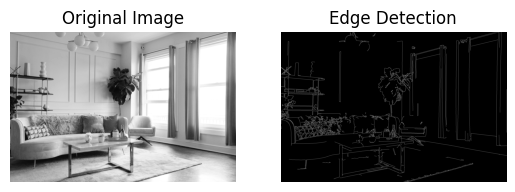

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def canny_edge_detection(image_path, low_threshold=50, high_threshold=150):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image is loaded
    if image is None:
        print("Error: Image not found.")
        return

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

    rgb_image = cv2.resize(edges, (edges.shape[1] // 2, edges.shape[0] // 2))
    cv2.imshow('Improved Depth-based Furniture Detection', rgb_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Display the original and edge-detected images side by side
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection'), plt.axis('off')

    plt.show()

# Example usage
canny_edge_detection('images/1.jpg')


In [6]:
import cv2
import numpy as np

def separate_foreground(image_path, depth_map_path, depth_threshold=100):
    # Load the image
    image = cv2.imread(image_path)

    # Load the depth map (assumed to be a grayscale image)
    depth_map = cv2.imread(depth_map_path, cv2.IMREAD_GRAYSCALE)

    # Resize the depth map to match the image dimensions (if necessary)
    depth_map = cv2.resize(depth_map, (image.shape[1], image.shape[0]))

    # Step 1: Perform edge detection on the original image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 150)

    # Step 2: Threshold the depth map to create a mask for the foreground
    _, depth_mask = cv2.threshold(depth_map, depth_threshold, 255, cv2.THRESH_BINARY)

    # Ensure both masks are single-channel and have the same size
    edges = cv2.resize(edges, (image.shape[1], image.shape[0]))  # Ensure size match

    # Step 3: Combine the depth mask with the edges to refine the foreground mask
    combined_mask = cv2.bitwise_and(depth_mask, edges)

    # Step 4: Apply the mask to the original image to isolate the foreground
    foreground = cv2.bitwise_and(image, image, mask=combined_mask)

    # Display the results
    cv2.imshow("Original Image", image)
    cv2.imshow("Depth Map", depth_map)
    cv2.imshow("Edges", edges)
    cv2.imshow("Foreground", foreground)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
separate_foreground('images/1.jpg', 'depth/1-dpt_beit_large_512.png', depth_threshold=100)

In [5]:
import cv2
import numpy as np

def get_foreground_bounding_box(image_path, depth_map_path, depth_threshold=100):
    # Load the image
    image = cv2.imread(image_path)

    # Load the depth map (assumed to be a grayscale image)
    depth_map = cv2.imread(depth_map_path, cv2.IMREAD_GRAYSCALE)

    # Resize the depth map to match the image dimensions (if necessary)
    depth_map = cv2.resize(depth_map, (image.shape[1], image.shape[0]))

    image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
    depth_map = cv2.resize(depth_map, (depth_map.shape[1] // 2, depth_map.shape[0] // 2))

    # Step 1: Perform edge detection on the original image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 150)

    # Step 2: Threshold the depth map to create a mask for the foreground
    _, depth_mask = cv2.threshold(depth_map, depth_threshold, 255, cv2.THRESH_BINARY)

    # Ensure both masks are single-channel and have the same size
    edges = cv2.resize(edges, (image.shape[1], image.shape[0]))  # Ensure size match

    # Step 3: Combine the depth mask with the edges to refine the foreground mask
    combined_mask = cv2.bitwise_and(depth_mask, edges)

    # Step 4: Find contours in the combined mask
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Get the bounding box of the largest contour (foreground)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Draw the bounding box on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the bounding box on the image
        cv2.imshow("Bounding Box", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Return bounding box coordinates
        return (x, y, w, h)
    else:
        print("No contours found!")
        return None

# Example usage
for i in range(0, 10):
    bbox = get_foreground_bounding_box(f'images/{i}.jpg', f'depth/{i}-dpt_beit_large_512.png', depth_threshold=100)
    print("Bounding box:", bbox)

Bounding box: (11, 506, 74, 102)
Bounding box: (55, 372, 157, 113)
Bounding box: (0, 568, 1000, 39)
Bounding box: (262, 935, 72, 24)
Bounding box: (873, 491, 78, 68)
Bounding box: (0, 585, 101, 74)
Bounding box: (769, 139, 226, 254)
Bounding box: (746, 559, 73, 107)
Bounding box: (334, 884, 141, 38)
Bounding box: (117, 603, 883, 89)


#### Contours

In [10]:
import cv2
import numpy as np

def find_and_draw_contours(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply threshold to convert the image to binary (black and white)
    ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image (we need a color version to visualize the contours)
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)
    
    # Display the image with contours
    image_color = cv2.resize(image_color, (image_color.shape[1] // 2, image_color.shape[0] // 2))
    cv2.imshow('Contours', image_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
find_and_draw_contours('images/1.jpg')

In [ ]:
# Grabcut algo can be used for further refinement

In [8]:
import cv2
import numpy as np

def extract_bboxes_from_depth(depth_map, min_depth=0.1, max_depth=0.9):
    # Normalize depth map between 0 and 255 for better visualization
    depth_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply a threshold to segment the objects based on depth values
    _, depth_thresh = cv2.threshold(depth_normalized, min_depth * 255, max_depth * 255, cv2.THRESH_BINARY)

    # Find contours of objects in the thresholded depth map
    contours, _ = cv2.findContours(depth_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bboxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bboxes.append((x, y, w, h))

    return bboxes, depth_thresh

def draw_bboxes_on_image(image, bboxes):
    # Draw bounding boxes on the image
    for (x, y, w, h) in bboxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

# Load your depth map and RGB image
depth_map = cv2.imread('depth/1-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)  # Grayscale depth map
image = cv2.imread('images/1.jpg')  # RGB image

# Extract bounding boxes from depth map
bboxes, depth_thresh = extract_bboxes_from_depth(depth_map)

# Draw bounding boxes on the RGB image
result_image = draw_bboxes_on_image(image.copy(), bboxes)

# Display the results
cv2.imshow('Depth Threshold', depth_thresh)
cv2.imshow('Bounding Boxes', result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np

def extract_bboxes_using_edges(depth_map):
    # Normalize depth map between 0 and 255 for better visualization
    depth_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(depth_normalized, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours from the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bboxes = []
    for contour in contours:
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)
        bboxes.append((x, y, w, h))

    return bboxes, edges

def draw_bboxes_on_image(image, bboxes):
    # Draw bounding boxes on the image
    for (x, y, w, h) in bboxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image


# Load your depth map and RGB image
depth_map = cv2.imread('depth/2-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)  # Grayscale depth map
image = cv2.imread('images/2.jpg')  # RGB image

# Extract bounding boxes using edge detection and contours
bboxes, edges = extract_bboxes_using_edges(depth_map)

# Draw bounding boxes on the RGB image
result_image = draw_bboxes_on_image(image.copy(), bboxes)

# Display the results
cv2.imshow('Edge Detection', edges)
cv2.imshow('Bounding Boxes', result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()



### Few More Methods

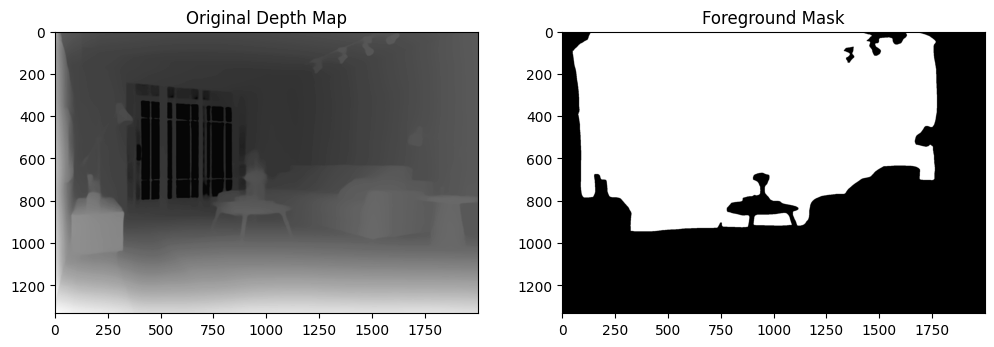

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_foreground(depth_map, threshold):
    # Create a binary mask where foreground pixels are white (255)
    # and background pixels are black (0)
    foreground_mask = np.where(depth_map < threshold, 255, 0).astype(np.uint8)
    
    # Optional: Apply morphological operations to clean up the mask
    kernel = np.ones((5,5), np.uint8)
    foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_CLOSE, kernel)
    foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel)
    
    return foreground_mask

# Load the depth map
# Replace 'depth_map.png' with the path to your depth map image
depth_map = cv2.imread('depth/0-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)

if depth_map is None:
    raise ValueError("Could not load the depth map image.")

# Normalize depth map to 0-255 range for visualization
depth_map_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)

# Set a threshold value (you may need to adjust this based on your depth map)
threshold = 75  # Assuming closer objects have lower depth values

# Detect foreground
foreground_mask = detect_foreground(depth_map, threshold)

# Display the result
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(depth_map_normalized, cmap='gray')
plt.title('Original Depth Map')
plt.subplot(122)
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()

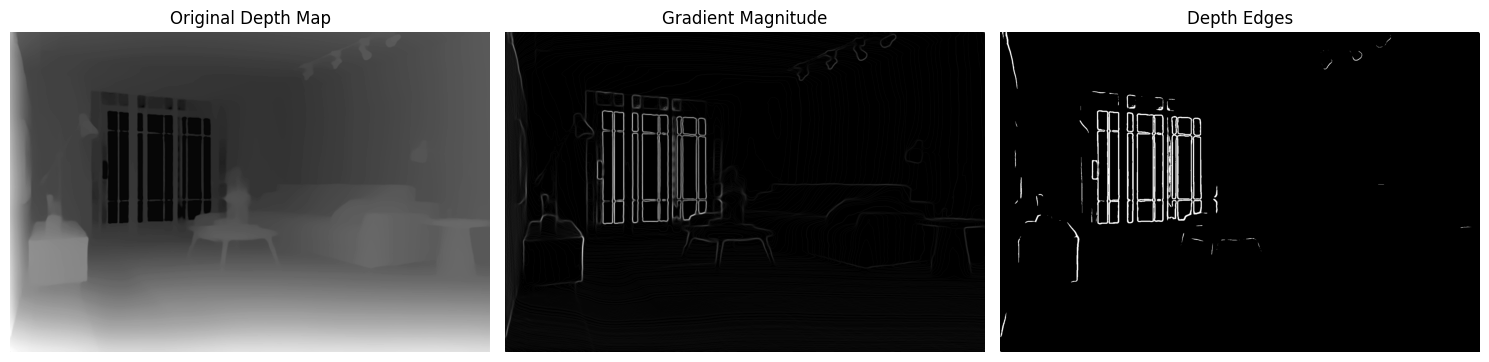

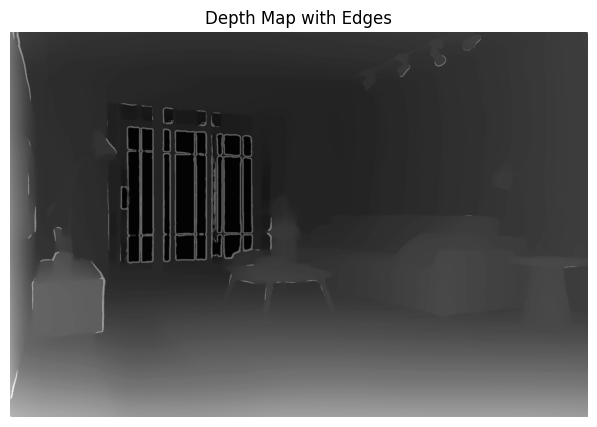

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the depth map (replace with your depth map path)
depth_map = cv2.imread('depth/0-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)

if depth_map is None:
    raise ValueError("Could not load the depth map image.")

# Normalize depth map to 0-255 range for visualization
depth_map_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)

def detect_depth_edges(depth_map, threshold):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(depth_map, (5, 5), 0)
    
    # Compute Sobel gradients
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute gradient magnitude
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalize gradient magnitude to 0-255
    grad_mag = cv2.normalize(grad_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Threshold to get edges
    edges = cv2.threshold(grad_mag, threshold, 255, cv2.THRESH_BINARY)[1]
    
    return edges, grad_mag

# Set threshold for edge detection (adjust as needed)
edge_threshold = 50

# Detect depth edges
depth_edges, gradient_magnitude = detect_depth_edges(depth_map, edge_threshold)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(depth_map_normalized, cmap='gray')
plt.title('Original Depth Map')
plt.axis('off')

plt.subplot(132)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(133)
plt.imshow(depth_edges, cmap='gray')
plt.title('Depth Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Combine original depth map with edges
depth_with_edges = cv2.addWeighted(depth_map_normalized, 0.7, depth_edges, 0.3, 0)
plt.figure(figsize=(10, 5))
plt.imshow(depth_with_edges, cmap='gray')
plt.title('Depth Map with Edges')
plt.axis('off')
plt.show()

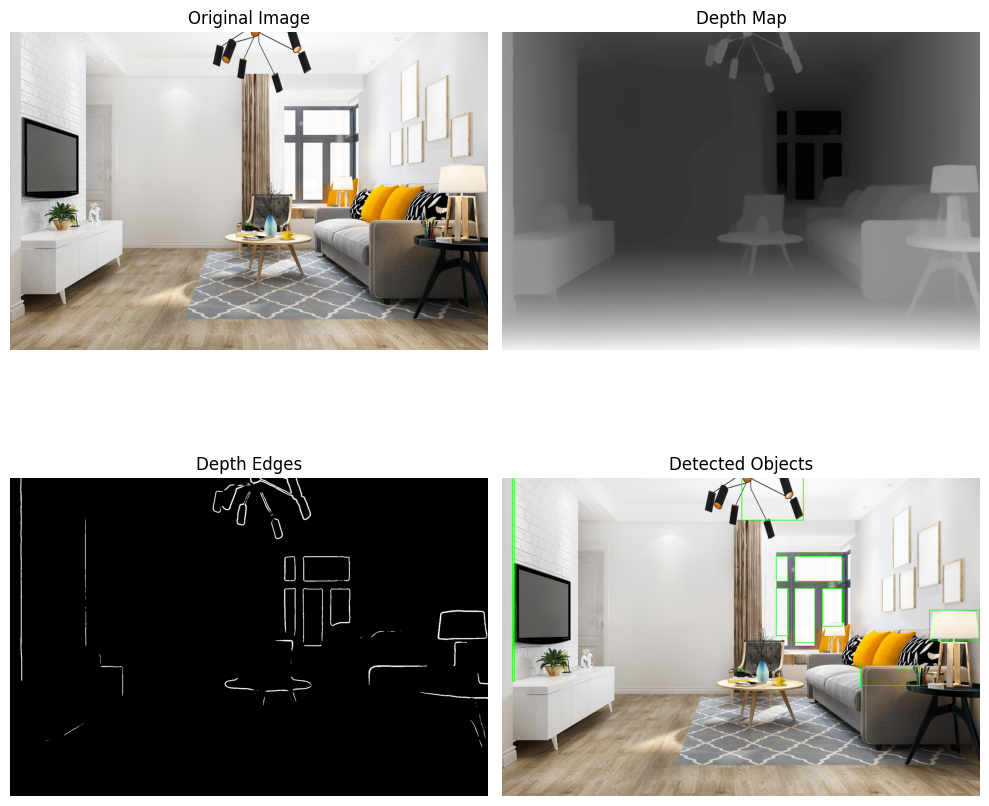

Object 1: x=1500, y=787, width=246, height=84
Object 2: x=1789, y=556, width=208, height=125
Object 3: x=1340, y=466, width=84, height=157
Object 4: x=1225, y=464, width=84, height=228
Object 5: x=1147, y=464, width=50, height=199
Object 6: x=1225, y=331, width=197, height=106
Object 7: x=1147, y=331, width=48, height=104
Object 8: x=1003, y=0, width=257, height=180
Object 9: x=43, y=0, width=8, height=853


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detect_depth_edges(depth_map, threshold):
    blurred = cv2.GaussianBlur(depth_map, (5, 5), 0)
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    grad_mag = cv2.normalize(grad_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    edges = cv2.threshold(grad_mag, threshold, 255, cv2.THRESH_BINARY)[1]
    return edges

def get_object_bboxes(edges, min_area=1000, max_area=100000):
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on area and get bounding boxes
    bboxes = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            x, y, w, h = cv2.boundingRect(contour)
            bboxes.append((x, y, w, h))
    
    return bboxes

# Load the original image and depth map
original_image = cv2.imread('images/4.jpg')
depth_map = cv2.imread('depth/4-dpt_beit_large_512.png', cv2.IMREAD_GRAYSCALE)

if original_image is None or depth_map is None:
    raise ValueError("Could not load the image or depth map.")

# Ensure original image is in RGB (OpenCV loads in BGR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Normalize depth map to 0-255 range for visualization
depth_map_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)

# Set threshold for edge detection (adjust as needed)
edge_threshold = 50

# Detect depth edges
depth_edges = detect_depth_edges(depth_map, edge_threshold)

# Get bounding boxes of objects
bboxes = get_object_bboxes(depth_edges)

# Draw bounding boxes on the original image
image_with_boxes = original_image.copy()
for (x, y, w, h) in bboxes:
    cv2.rectangle(image_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(depth_map_normalized, cmap='gray')
plt.title('Depth Map')
plt.axis('off')

plt.subplot(223)
plt.imshow(depth_edges, cmap='gray')
plt.title('Depth Edges')
plt.axis('off')

plt.subplot(224)
plt.imshow(image_with_boxes)
plt.title('Detected Objects')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print bounding box coordinates
for i, (x, y, w, h) in enumerate(bboxes):
    print(f"Object {i+1}: x={x}, y={y}, width={w}, height={h}")

### Using SAM + Depth Map

In [31]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 KB 98.5 kB/s eta 0:00:0000:0100:01
  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl (797.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 607.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.9 MB/s eta 0:00:00a 0:00:01
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (209.4 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_cuda_cupti_cu12-12.1.10

In [33]:
from ultralytics import SAM

sam = SAM("sam2_l.pt")

results = sam('images/1.jpg')

OutOfMemoryError: CUDA out of memory. Tried to allocate 256.00 MiB. GPU 0 has a total capacity of 3.71 GiB of which 20.88 MiB is free. Including non-PyTorch memory, this process has 3.67 GiB memory in use. Of the allocated memory 3.34 GiB is allocated by PyTorch, and 201.70 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# for result in results:
#     boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
#     probs = result.probs  # Probs object for classification outputs
#     obb = result.obb  # Oriented boxes object for OBB outputs
#     result.show()  # display to screen

### Object Detection using Depth Map

In [5]:
import numpy as np
import cv2

def load_depth_map(file_path):
    """Load a depth map from file."""
    image = cv2.imread(file_path, cv2.IMREAD_ANYDEPTH)
    image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
    return image

def preprocess_depth_map(depth_map):
    """Preprocess the depth map."""
    # Normalize depth values to 0-255 range
    depth_map = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert to 8-bit for easier processing
    depth_map = np.uint8(depth_map)
    
    # Apply median filter to reduce noise
    depth_map = cv2.medianBlur(depth_map, 5)
    
    return depth_map

def detect_objects(depth_map, min_area=100, max_area=10000):
    """Detect objects in the depth map using thresholding and contour detection."""
    # Threshold the depth map to separate foreground from background
    _, thresholded = cv2.threshold(depth_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on area to remove noise and very large objects
    filtered_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]
    
    # Create an output image to draw the detected objects
    output = cv2.cvtColor(depth_map, cv2.COLOR_GRAY2BGR)
    
    # Draw bounding boxes around detected objects
    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return output, len(filtered_contours)

for i in range(10):
    # Load and preprocess depth map
    depth_map = load_depth_map(f'depth/{i}-dpt_beit_large_512.png')
    preprocessed = preprocess_depth_map(depth_map)

    # Detect objects
    result, num_objects = detect_objects(preprocessed)

    print(f"Number of objects detected: {num_objects}")

    # Display results
    cv2.imshow('Original Depth Map', depth_map)
    cv2.imshow('Detected Objects', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Number of objects detected: 0
Number of objects detected: 1
Number of objects detected: 1
Number of objects detected: 0
Number of objects detected: 0
Number of objects detected: 0
Number of objects detected: 1
Number of objects detected: 0
Number of objects detected: 0
Number of objects detected: 0
